In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [3]:
#path = '/content/drive/MyDrive/Colab Datasets/Daily Bike Sharing.csv'

In [4]:
data = pd.read_csv('Daily Bike Sharing.csv',index_col = "dteday", parse_dates = True)
data.head(5)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#Select variables
dataset = data.loc[:, ["cnt", "holiday", "workingday", "weathersit",
                       "temp", "atemp", "hum", "windspeed"]]
dataset.head(5)

,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446
2011-01-02,801,0,0,2,0.363478,0.353739,0.696087,0.248539
2011-01-03,1349,0,1,1,0.196364,0.189405,0.437273,0.248309
2011-01-04,1562,0,1,1,0.200000,0.212122,0.590435,0.160296
2011-01-05,1600,0,1,1,0.226957,0.229270,0.436957,0.186900


In [6]:
#Rename the dependent variable
dataset = dataset.rename(columns = {'cnt' : 'y'})
dataset.head(5)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446
2011-01-02,801,0,0,2,0.363478,0.353739,0.696087,0.248539
2011-01-03,1349,0,1,1,0.196364,0.189405,0.437273,0.248309
2011-01-04,1562,0,1,1,0.200000,0.212122,0.590435,0.160296
2011-01-05,1600,0,1,1,0.226957,0.229270,0.436957,0.186900


In [7]:
#Modify the index to daily frequency

dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq=None)

In [8]:
dataset = dataset.asfreq("D")
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

<Axes: xlabel='dteday'>

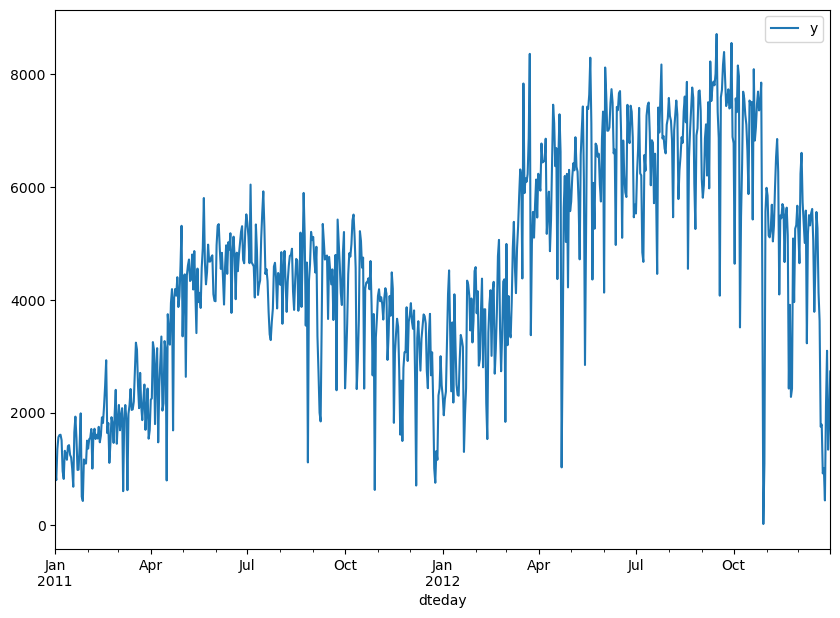

In [9]:
#Visualisation
dataset["y"].plot(figsize = (10, 7), legend = True)

In [10]:
#Training and test set
#We will use the last month of 2012 --> December 2012
test_days = 31
training_set = dataset.iloc[:-test_days, :]     #it goes to the beggining until the last 31 days
test_set = dataset.iloc[-test_days:, :]

In [11]:
training_set.tail(2)   #just to check if the system is considering the 31 days and if is correct

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2012-11-29,5323,0,1,1,0.280870,0.298422,0.555652,0.115522
2012-11-30,5668,0,1,1,0.298333,0.323867,0.649583,0.058471


In [12]:
test_set.head(2)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2012-12-01,5191,0,0,2,0.298333,0.316904,0.806667,0.059704
2012-12-02,4649,0,0,2,0.347500,0.359208,0.823333,0.124379


In [13]:
test_set.tail(2)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2012-12-30,1796,0,0,1,0.255833,0.231700,0.483333,0.350754
2012-12-31,2729,0,1,2,0.215833,0.223487,0.577500,0.154846


In [14]:
#Holt Winters

#Importing special library
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [15]:
#We create the model<<<<<<<<<<<<<<<<<<<<<<<<<<
model = ExponentialSmoothing(endog = training_set.y,
                             trend = 'mul',
                             seasonal = 'mul',
                             seasonal_periods = 7).fit()

#endog is the dependent variable
#trend: we need to indicate if it is multiplicative or additive
#seasonal: this is the seasonality. We use multiplicative
#seasonal periods: In this case the general interval will happen every 7 days (weekly seasonality period)

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [16]:
#Predictions
predictions_hw = model.forecast(steps = len(test_set)).rename("HW")
predictions_hw.head()

#we want to predict the size of the test set

2012-12-01    4676.804684
2012-12-02    4153.246795
2012-12-03    4322.003783
2012-12-04    4279.673415
2012-12-05    4825.991667
Freq: D, Name: HW, dtype: float64

<Axes: xlabel='dteday'>

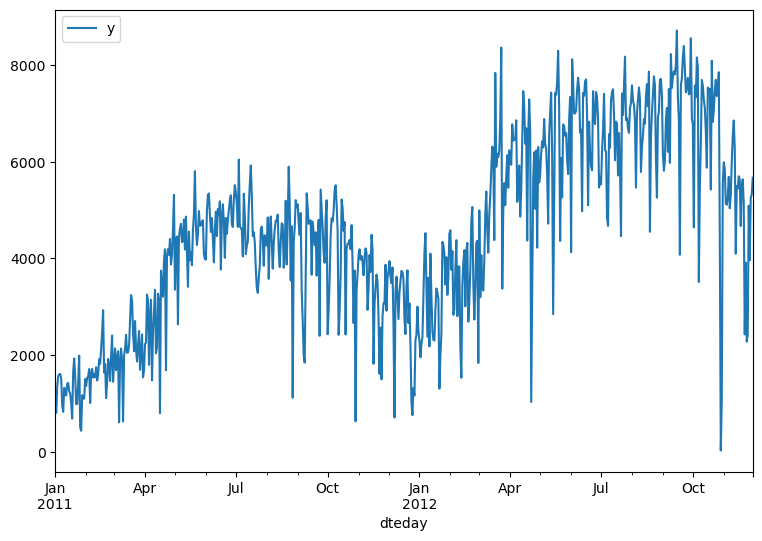

In [17]:
#Visualisation of our model
training_set['y'].plot(figsize = (9,6), legend = True)

<Axes: xlabel='dteday'>

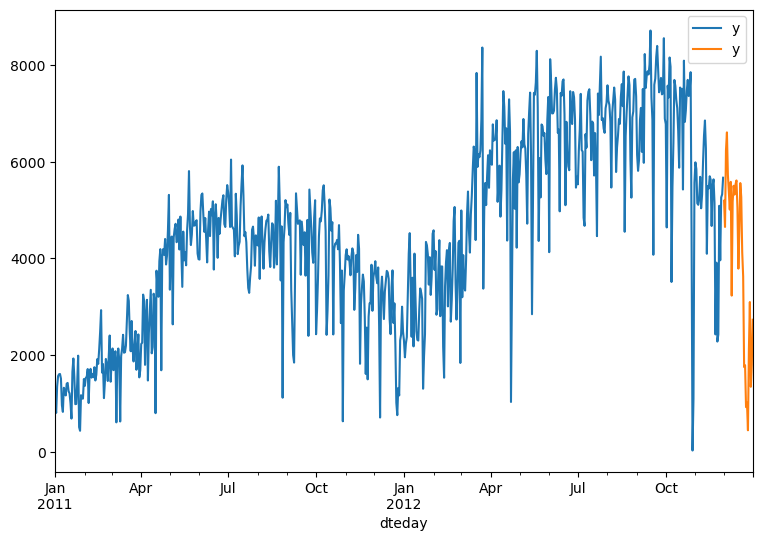

In [18]:
#Visualisation of our model
training_set['y'].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)

In [19]:
# the original data, but appears the last month appears in yellow

<Axes: xlabel='dteday'>

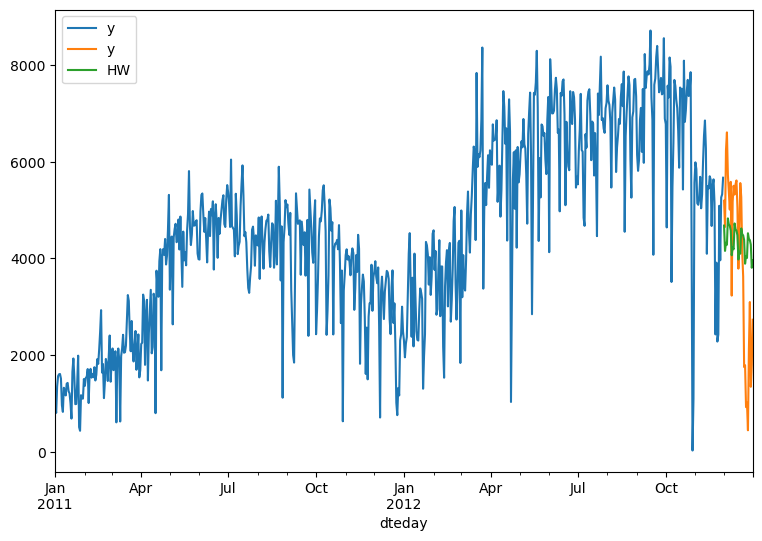

In [20]:
#Visualisation of our model
training_set['y'].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
predictions_hw.plot(legend = True)

<Axes: xlabel='dteday'>

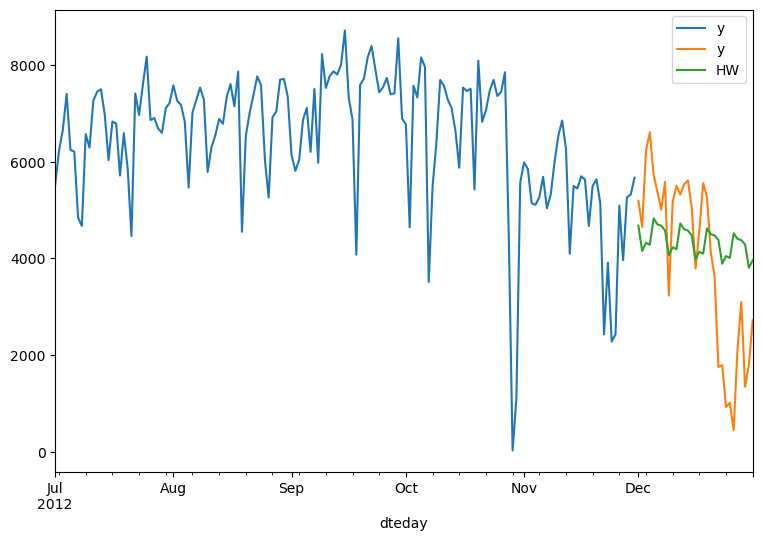

In [21]:
#Visualisation of our model using less data to see closer (let's use the last 6 months)
training_set['y']['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
predictions_hw.plot(legend = True)

Model Assessment


In [22]:
#We analyse MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_hw),0))
#we round the number, and I will include 0 because I don't want decimals in the result for the visualisation
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_hw)), 0))
#we round the number, and I will include 0 because I don't want decimals in the result for the visualisation

1389.0
1698.0


In [23]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_hw)

87.26099293841784

In [24]:
# the error is too much, we expect maximum arround 30%

## TESTING WITH 31 DAYS NOW:

In [25]:
# just change the firstcode, the rest will be tha same.

In [26]:
#We will predict for the next 30 days NOW, different than the previous one

next_62_days_prediction = model.forecast(steps = 62).rename('HW_30_Days')
next_62_days_prediction

# isnot considering januayr yet, since december just
# the problem of this model is the flexibility.
# is being incuded the first 30 days of my dataset.
# if we wanna see the january forecast, we have to add more days (62 now) to be able to see it.

2012-12-01    4676.804684
2012-12-02    4153.246795
2012-12-03    4322.003783
2012-12-04    4279.673415
2012-12-05    4825.991667
                 ...     
2013-01-27    3484.390762
2013-01-28    3625.970428
2013-01-29    3590.457117
2013-01-30    4048.794019
2013-01-31    3944.538798
Freq: D, Name: HW_30_Days, Length: 62, dtype: float64

In [27]:
#We create the model
model = ExponentialSmoothing(endog = training_set.y,
                             trend = 'mul',
                             seasonal = 'mul',
                             seasonal_periods = 7).fit()

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [28]:
#Predictions
next_62_days_prediction = model.forecast(steps = 62).rename("HW January")  #HW=hot winter
next_62_days_prediction


2012-12-01    4676.804684
2012-12-02    4153.246795
2012-12-03    4322.003783
2012-12-04    4279.673415
2012-12-05    4825.991667
                 ...     
2013-01-27    3484.390762
2013-01-28    3625.970428
2013-01-29    3590.457117
2013-01-30    4048.794019
2013-01-31    3944.538798
Freq: D, Name: HW January, Length: 62, dtype: float64

<Axes: xlabel='dteday'>

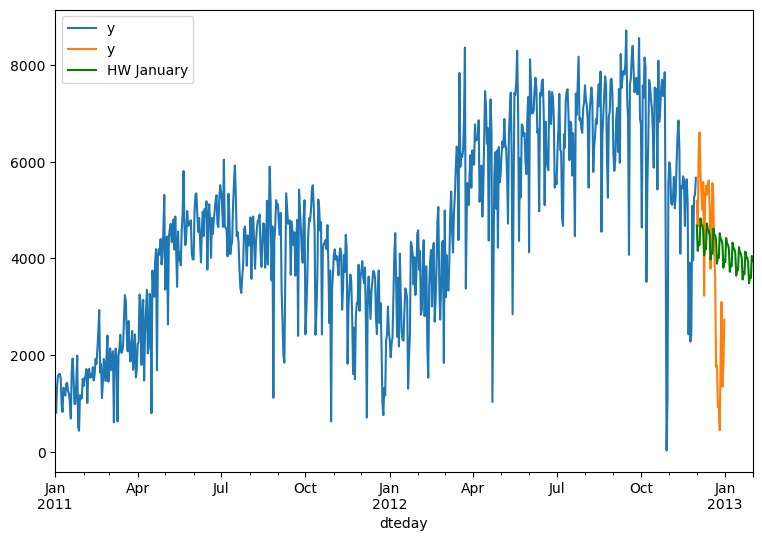

In [29]:
#Visualisation

training_set['y'].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
next_62_days_prediction.plot(legend = True, color = 'green')

In [30]:
# orange= testing data, green= prediction
# the prediction works weel, but in general is not a good model for this dataset because doesnit follow the trend.

Export the predictions

In [31]:
%cd /content/drive/MyDrive/Colab Datasets

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/Colab Datasets'
C:\Users\Admin\Downloads


In [32]:
predictions_hw.to_csv('predictions_mlb.csv', index = True)